<center>
<h3 name="illness" style="border-color: black;  
           border-width: 3px;
           color: white;
           font-size:30px;
           background-color: blue;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 8px">
    India 2023 Weather Predictive Analysis Project
</h3>
</center>

* **Creator** : Anandan Raju
* **Source** : https://www.ncdc.noaa.gov/cdo-web/search

# Introduction

Weather forecasting is the use of science and technology to forecast atmospheric conditions for a certain place and period.

**Types of Weather Forecasting**

* Short Range Forecasting 
* Medium Range Forecasting 
* Long-Range Forecasts

**Weather Forecasting Process**

A weather forecast is made up of three steps: observation and analysis, extrapolation to determine the state of the atmosphere in the future, and estimation of specific variables. One method of qualitative extrapolation is to conclude the weather features will continue to travel in the same direction as they have been.

> #### Observation and Analysis

1. While data-access policies differ by country, all of these reports are sent to regional and global centers through the World Meteorological Organization's (WMO) Global Telecommunications System (GTS).

2. The data is then compiled, redistributed in the GTS, and used in various numerical forecasting models. Typically, these numerical models begin with data collected between the hours of 0000 and 1200 UTC (7 A.M. and 7 P.M. Eastern Standard Time, respectively).

3. To aid the forecaster, the data is printed, mapped, and graphed in several ways. Furthermore, some "initialization" routines slightly change the data when it enters a prediction model only for that model.

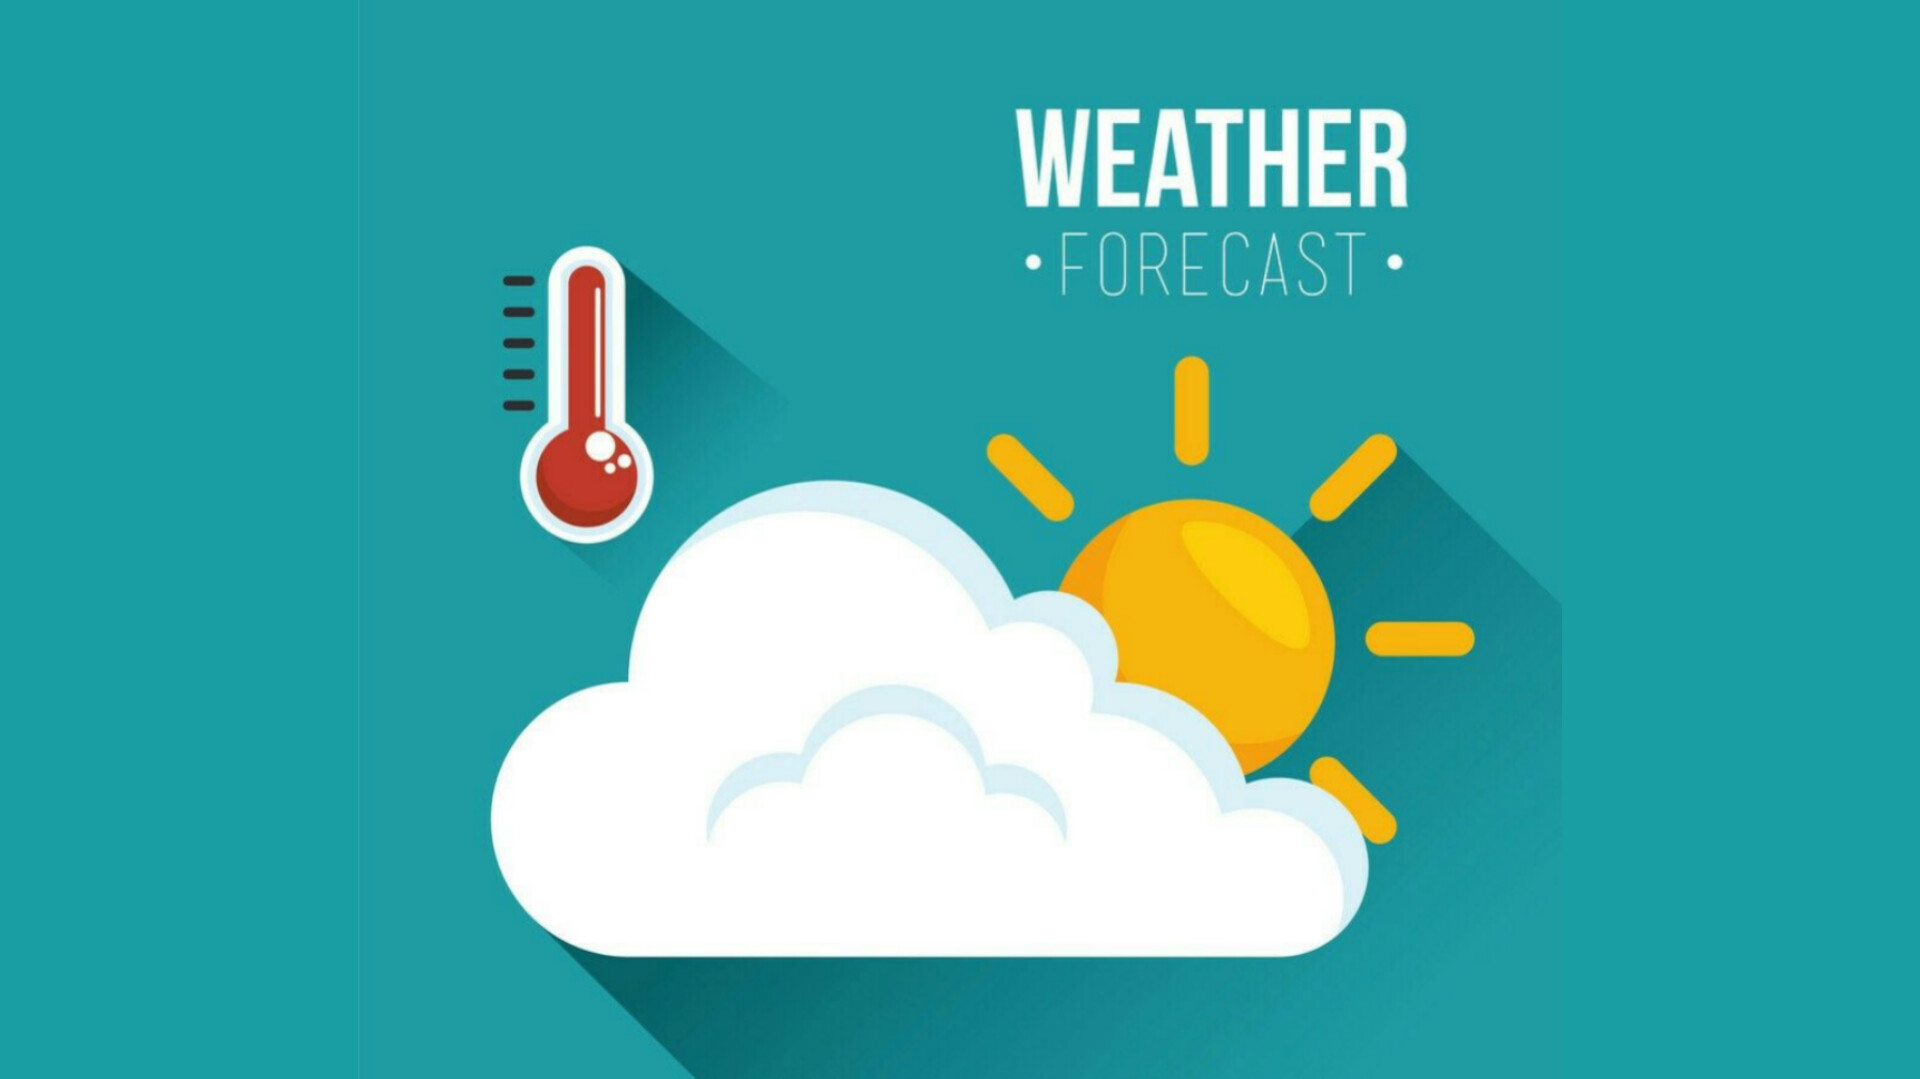

## Precipitation :

Precipitation is water that falls back to the surface of the earth upon condensing in the atmosphere. In other words, any form of water which falls, whether it is in liquid or frozen form, falls as precipitation only. Now that we are clear on what is precipitation, let us move on to the different types. You can consider heavy or light rain as precipitation and even snow, drizzle and hail.

Types of Precipitation : 

Precipitation plays a major part in the water cycle as it is the one which brings in the deposit of freshwater on the planet. It can be divided into three categories depending upon the form such as:

- Liquid water
- Ice
- Liquid water freezes when comes in contact with the surface

## Temperature :

Temperature, measure of hotness or coldness expressed in terms of any of several arbitrary scales and indicating the direction in which heat energy will spontaneously flow i.e., from a hotter body (one at a higher temperature) to a colder body (one at a lower temperature).

Three temperature scales are in general use today. 

- The Fahrenheit (°F) temperature scale is used in the United States and a few other English-speaking countries. 
- The Celsius (°C) temperature scale is standard in virtually all countries that have adopted the metric system of measurement, and it is widely used in the sciences. 
- The Kelvin (K) scale, an absolute temperature scale (obtained by shifting the Celsius scale by −273.15° so that absolute zero coincides with 0 K), is recognized as the international standard for scientific temperature measurement.

<a id="table"></a>

<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:20px;
           background-color: light;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 10px">
    Table of Contents
</h3>


1. [Import Libraries & Install Packages](#import)
2. [Reading and Checking Dataset](#read)
3. [Exploratory Data Analysis](#eda)
4. [Checking for Missing Value](#check)
5. [Training ML Model](#train)
6. [Evaluate Model](#eva)
7. [Function to Make Prediction](#func)
8. [Addition of Rolling Means](#add)
9. [Adding Monthly and Daily Averages](#roll)
10. [Running Model Diagnostics](#run)
11. [GeoMap Creation](#geo)
12. [Creation of Pandas Profiling Report](#create)

<a id="import"></a>

<center>
<h1 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    1. Import Libraries & Install Packages
</h1>
</center>


[Table of contents](#table)

In [1]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter-datatables

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import folium

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import ArcGIS
from pandas_profiling import ProfileReport

from jupyter_datatables import init_datatables_mode

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    2. Reading and Checking Dataset
</h3>
</center>

[Table of contents](#table)

In [6]:
weather = pd.read_csv("India_Weather_2008_to_2022.csv",index_col='DATE')

In [7]:
weather.index.is_monotonic

False

In [8]:
weather.duplicated().value_counts()

False    155242
True      68958
dtype: int64

In [9]:
weather.head()

STATION             NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                       
01-01-2018  IN017111200  BHUBANESWAR, IN    20.250     85.833       46.0   
01-01-2018  IN019040100       BARMER, IN    25.750     71.383      194.0   
01-01-2018  IN005010600    AHMADABAD, IN    23.067     72.633       55.0   
01-01-2018  IN005100400    PORBANDAR, IN    21.650     69.667        7.0   
01-01-2018  IN002050100     PASIGHAT, IN    28.100     95.383      157.0   

            PRCP  TAVG  TMAX  TMIN  
DATE                                
01-01-2018   NaN    69   NaN   NaN  
01-01-2018   NaN    65  84.0  51.0  
01-01-2018   NaN    69   NaN  51.0  
01-01-2018   NaN    68  85.0  54.0  
01-01-2018   NaN    69  78.0  49.0

In [10]:
pd.Series(weather['NAME'].value_counts())

THIRUVANANTHAPURAM, IN    3645
BAREILLY, IN              1823
BHUJ RUDRAMATA, IN        1823
POONA, IN                 1823
PATNA, IN                 1823
                          ... 
SANGLI, IN                 340
ALLAHABAD, IN               49
PARBHANI, IN                 9
CHERRAPUNJI, IN              7
PHALODI, IN                  2
Name: NAME, Length: 137, dtype: int64

<a id="eda"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    3. Exploratory Data Analysis
</h3>
</center>

[Table of contents](#table)

In [11]:
weather.describe().T

count        mean         std     min    25%      50%      75%  \
LATITUDE   224200.0   21.701109    5.977627   8.467  17.45   22.717   26.233   
LONGITUDE  224200.0   79.776829    6.211600  68.850  75.40   78.250   83.250   
ELEVATION  224200.0  303.068816  406.967568   3.000  38.00  177.000  393.000   
PRCP        72155.0    0.439194    0.911140   0.000   0.00    0.080    0.470   
TAVG       224200.0   78.979536   10.036296  25.000  74.00   81.000   86.000   
TMAX       118640.0   89.845491   10.091496  35.000  85.00   90.000   96.000   
TMIN       187867.0   68.579032   11.204690  16.000  62.00   72.000   77.000   

                max  
LATITUDE     34.083  
LONGITUDE    95.383  
ELEVATION  2311.000  
PRCP         18.900  
TAVG        110.000  
TMAX        123.000  
TMIN         94.000

array([[<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>],
       [<AxesSubplot:title={'center':'PRCP'}>,
        <AxesSubplot:title={'center':'TAVG'}>,
        <AxesSubplot:title={'center':'TMAX'}>],
       [<AxesSubplot:title={'center':'TMIN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

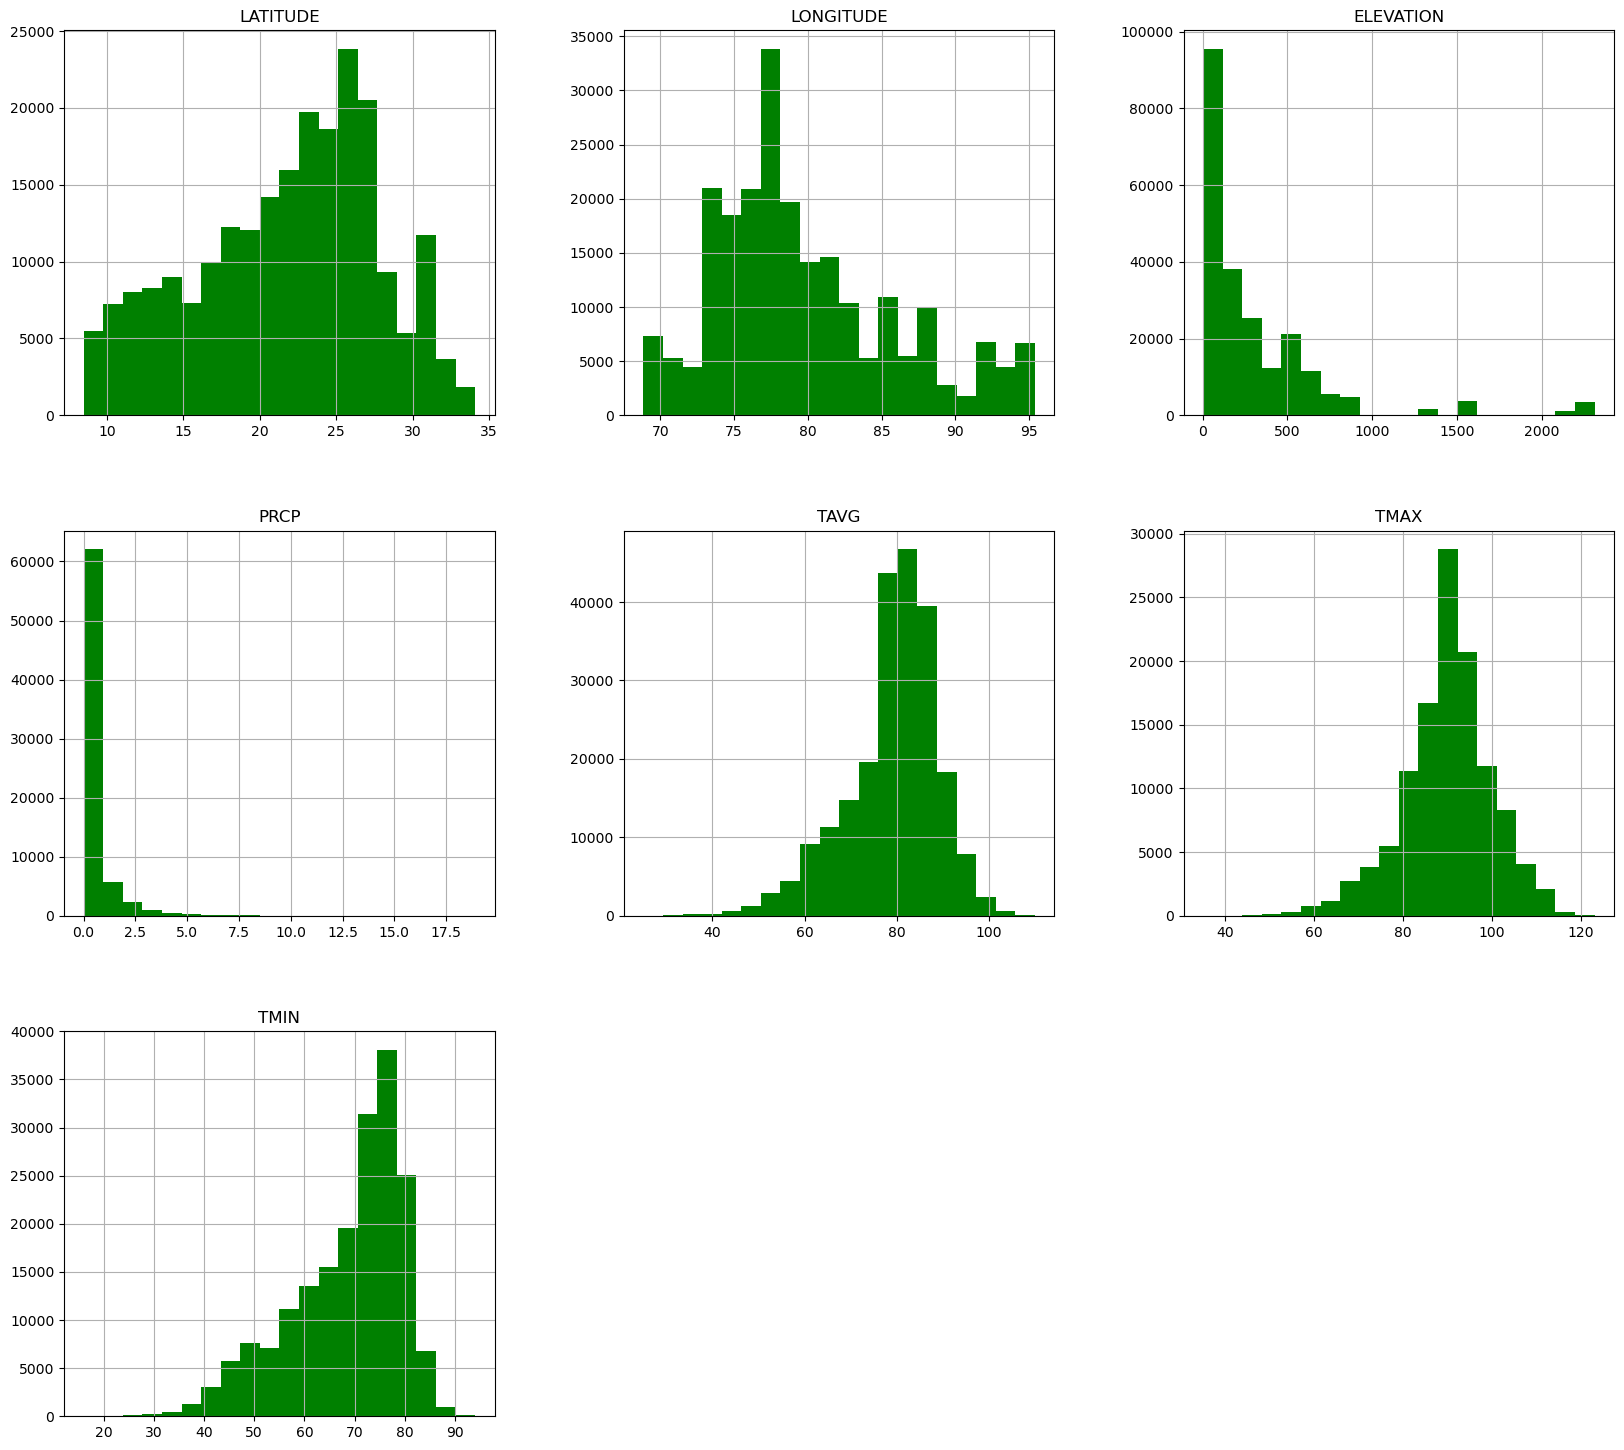

In [12]:
weather.hist(bins=20,figsize=(20,18),color='green')

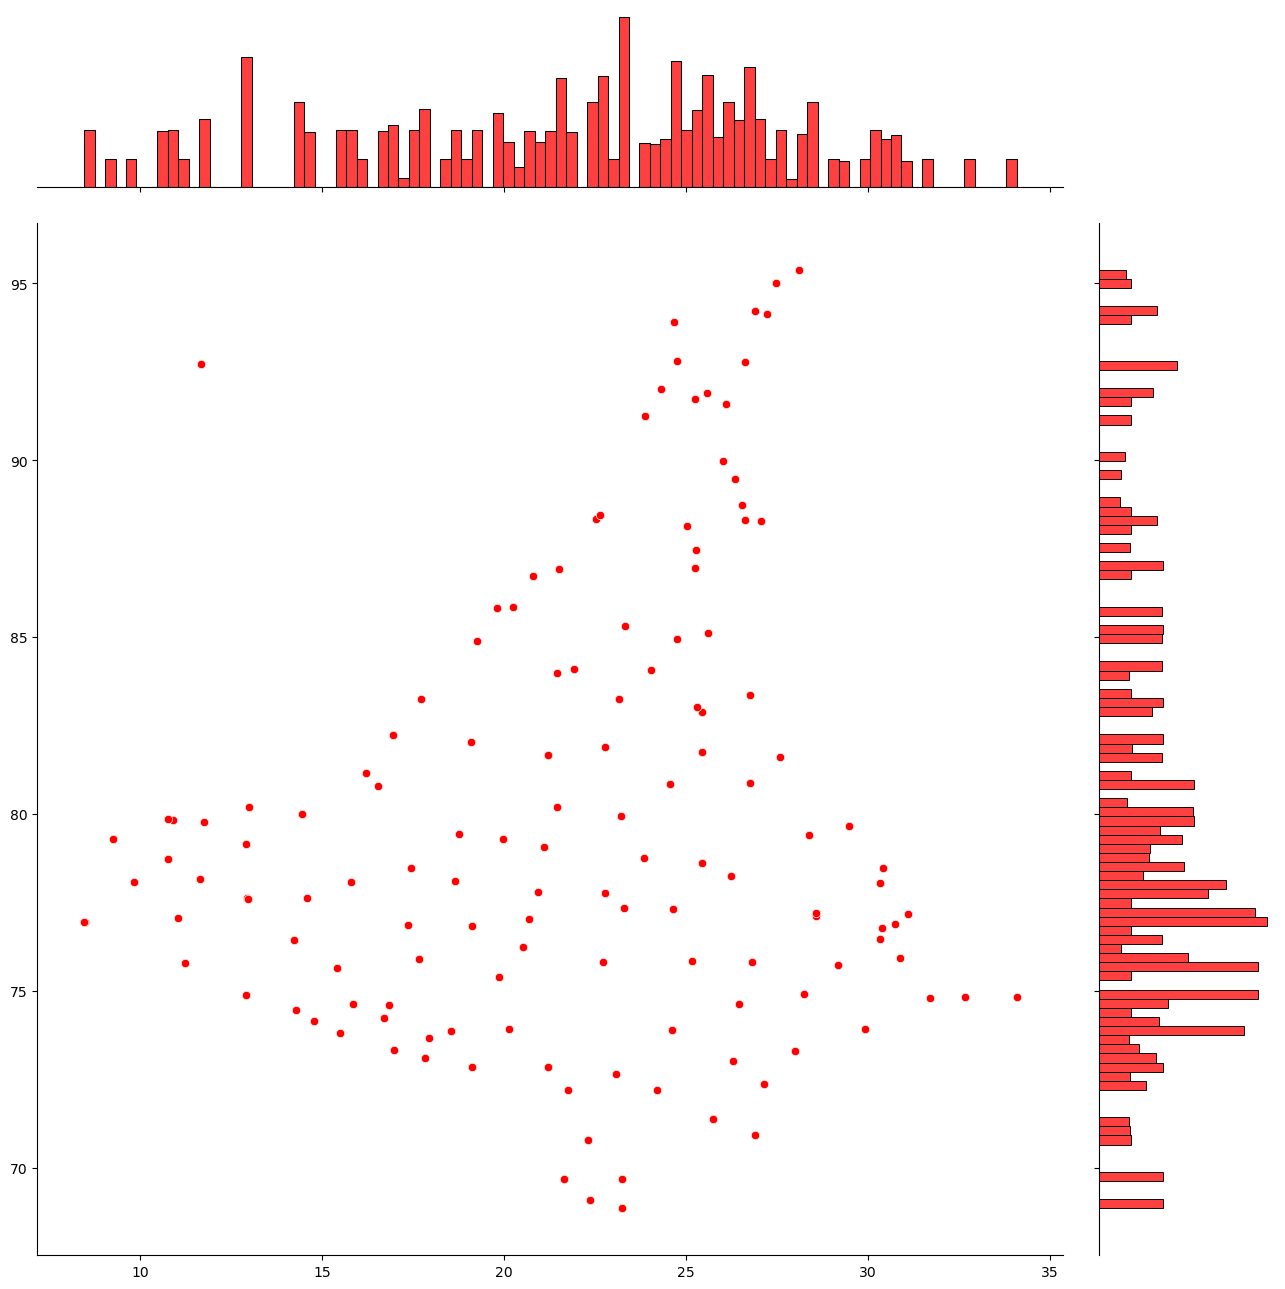

<Figure size 700x700 with 0 Axes>

In [13]:
sns.jointplot(x=weather.LATITUDE.values, y=weather.LONGITUDE.values, size=13,color='RED')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.figure(figsize=(7,7))
plt.show()

<AxesSubplot:xlabel='PRCP', ylabel='NAME'>

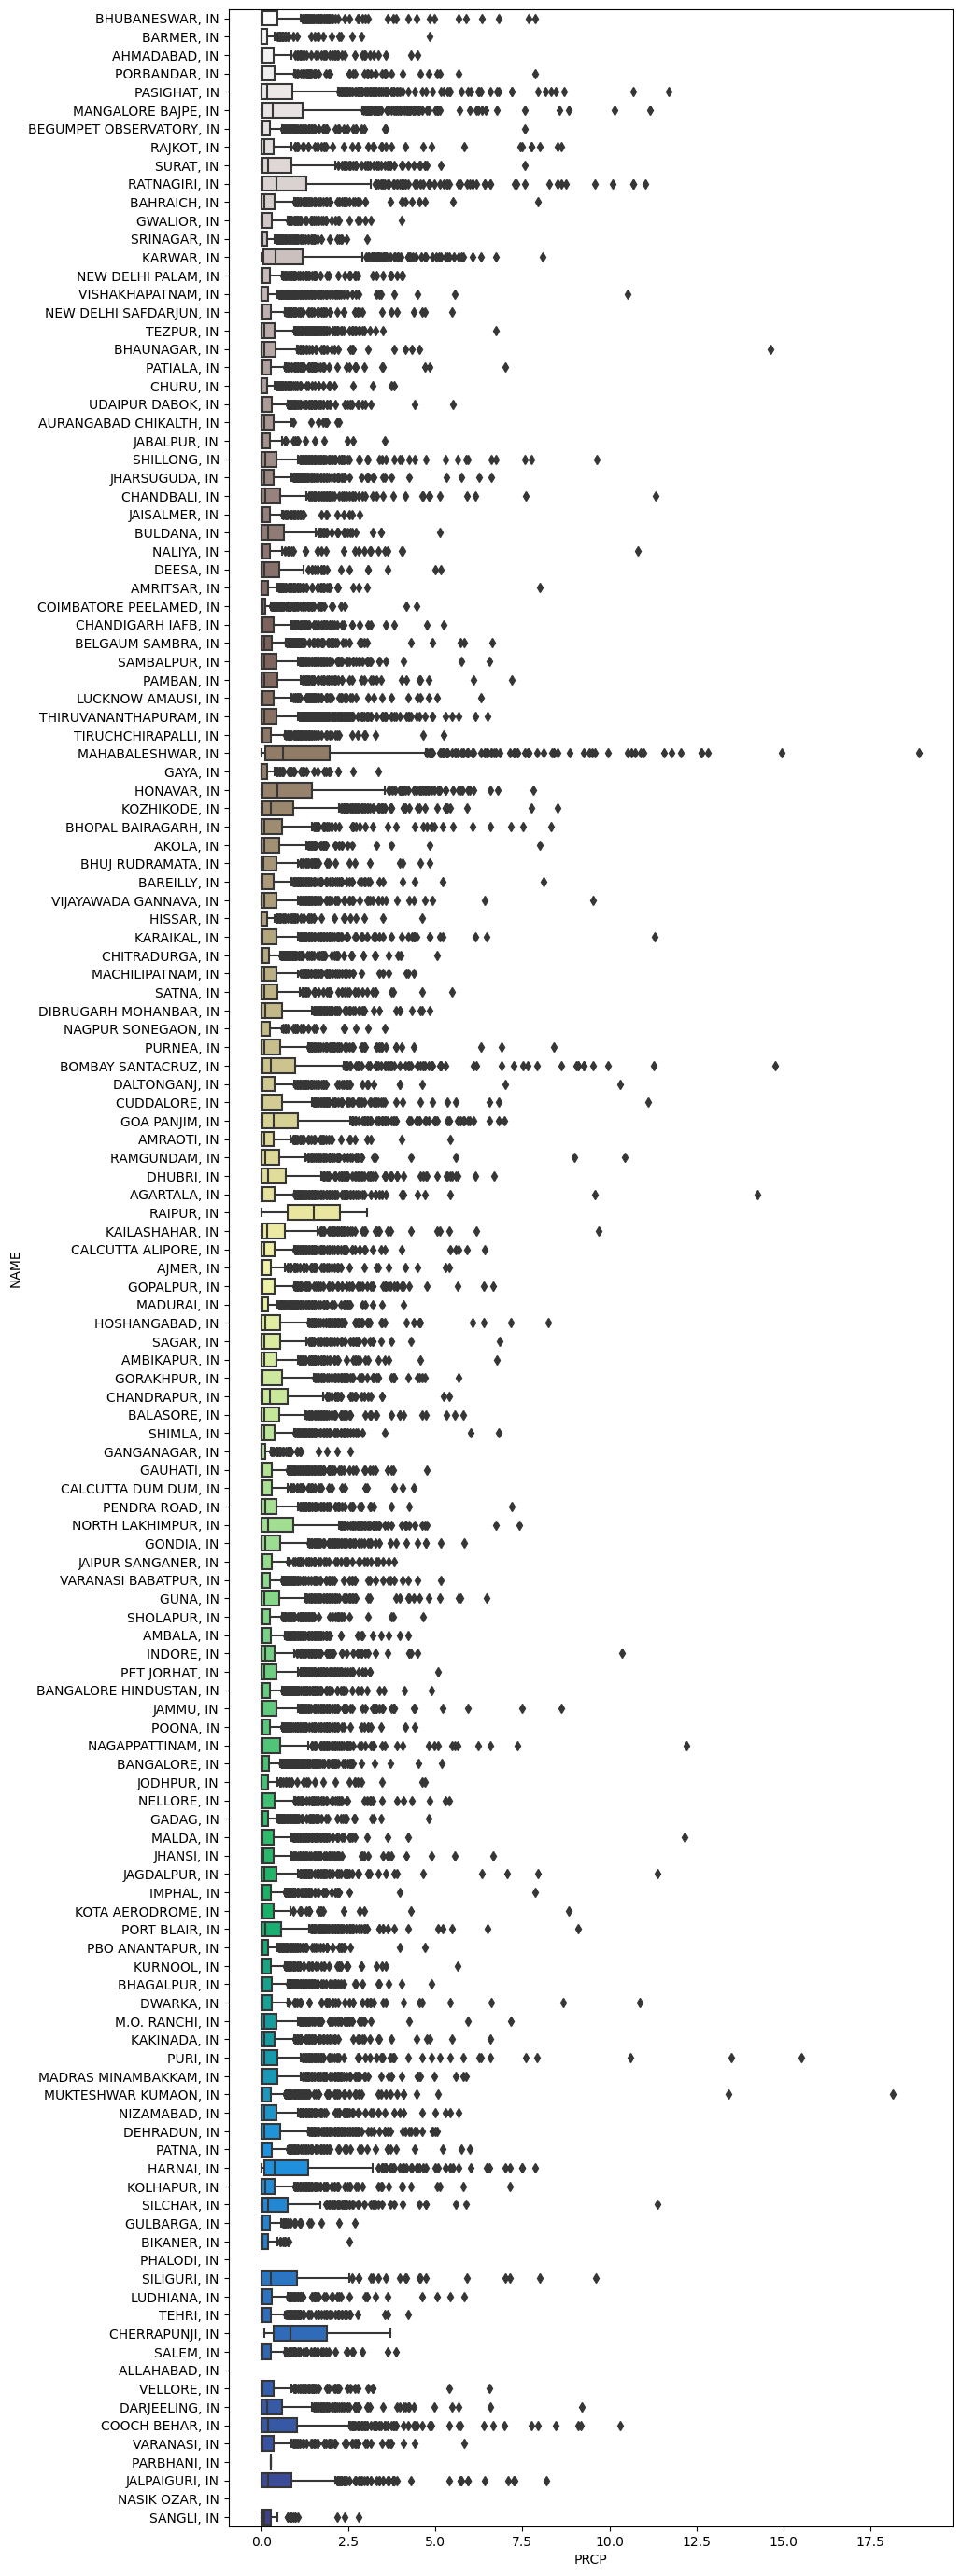

In [14]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='PRCP',data=weather,palette='terrain_r')

<AxesSubplot:xlabel='TMAX', ylabel='NAME'>

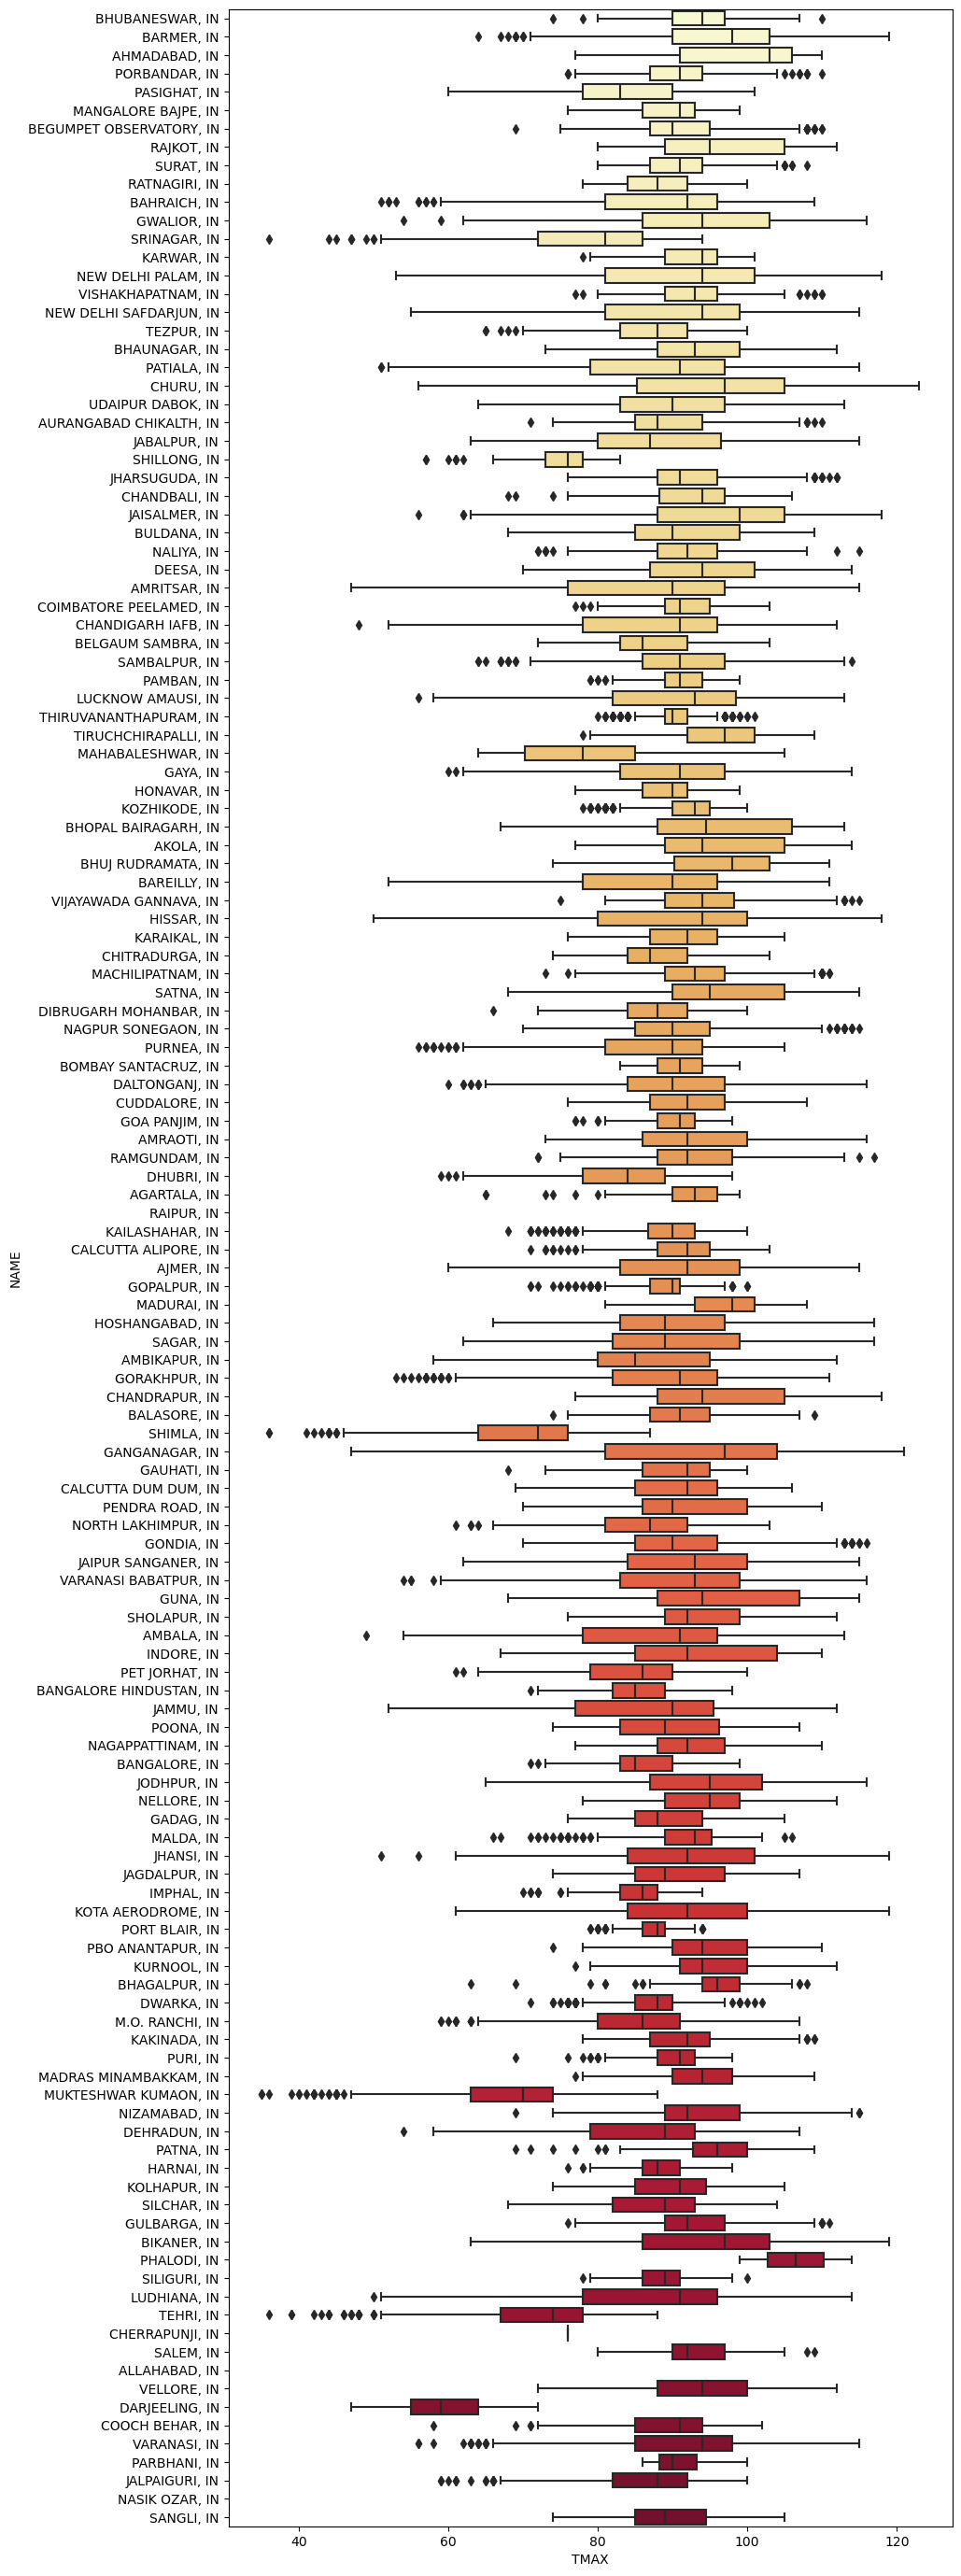

In [15]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='TMAX',data=weather,palette='YlOrRd')

<AxesSubplot:xlabel='TMIN', ylabel='NAME'>

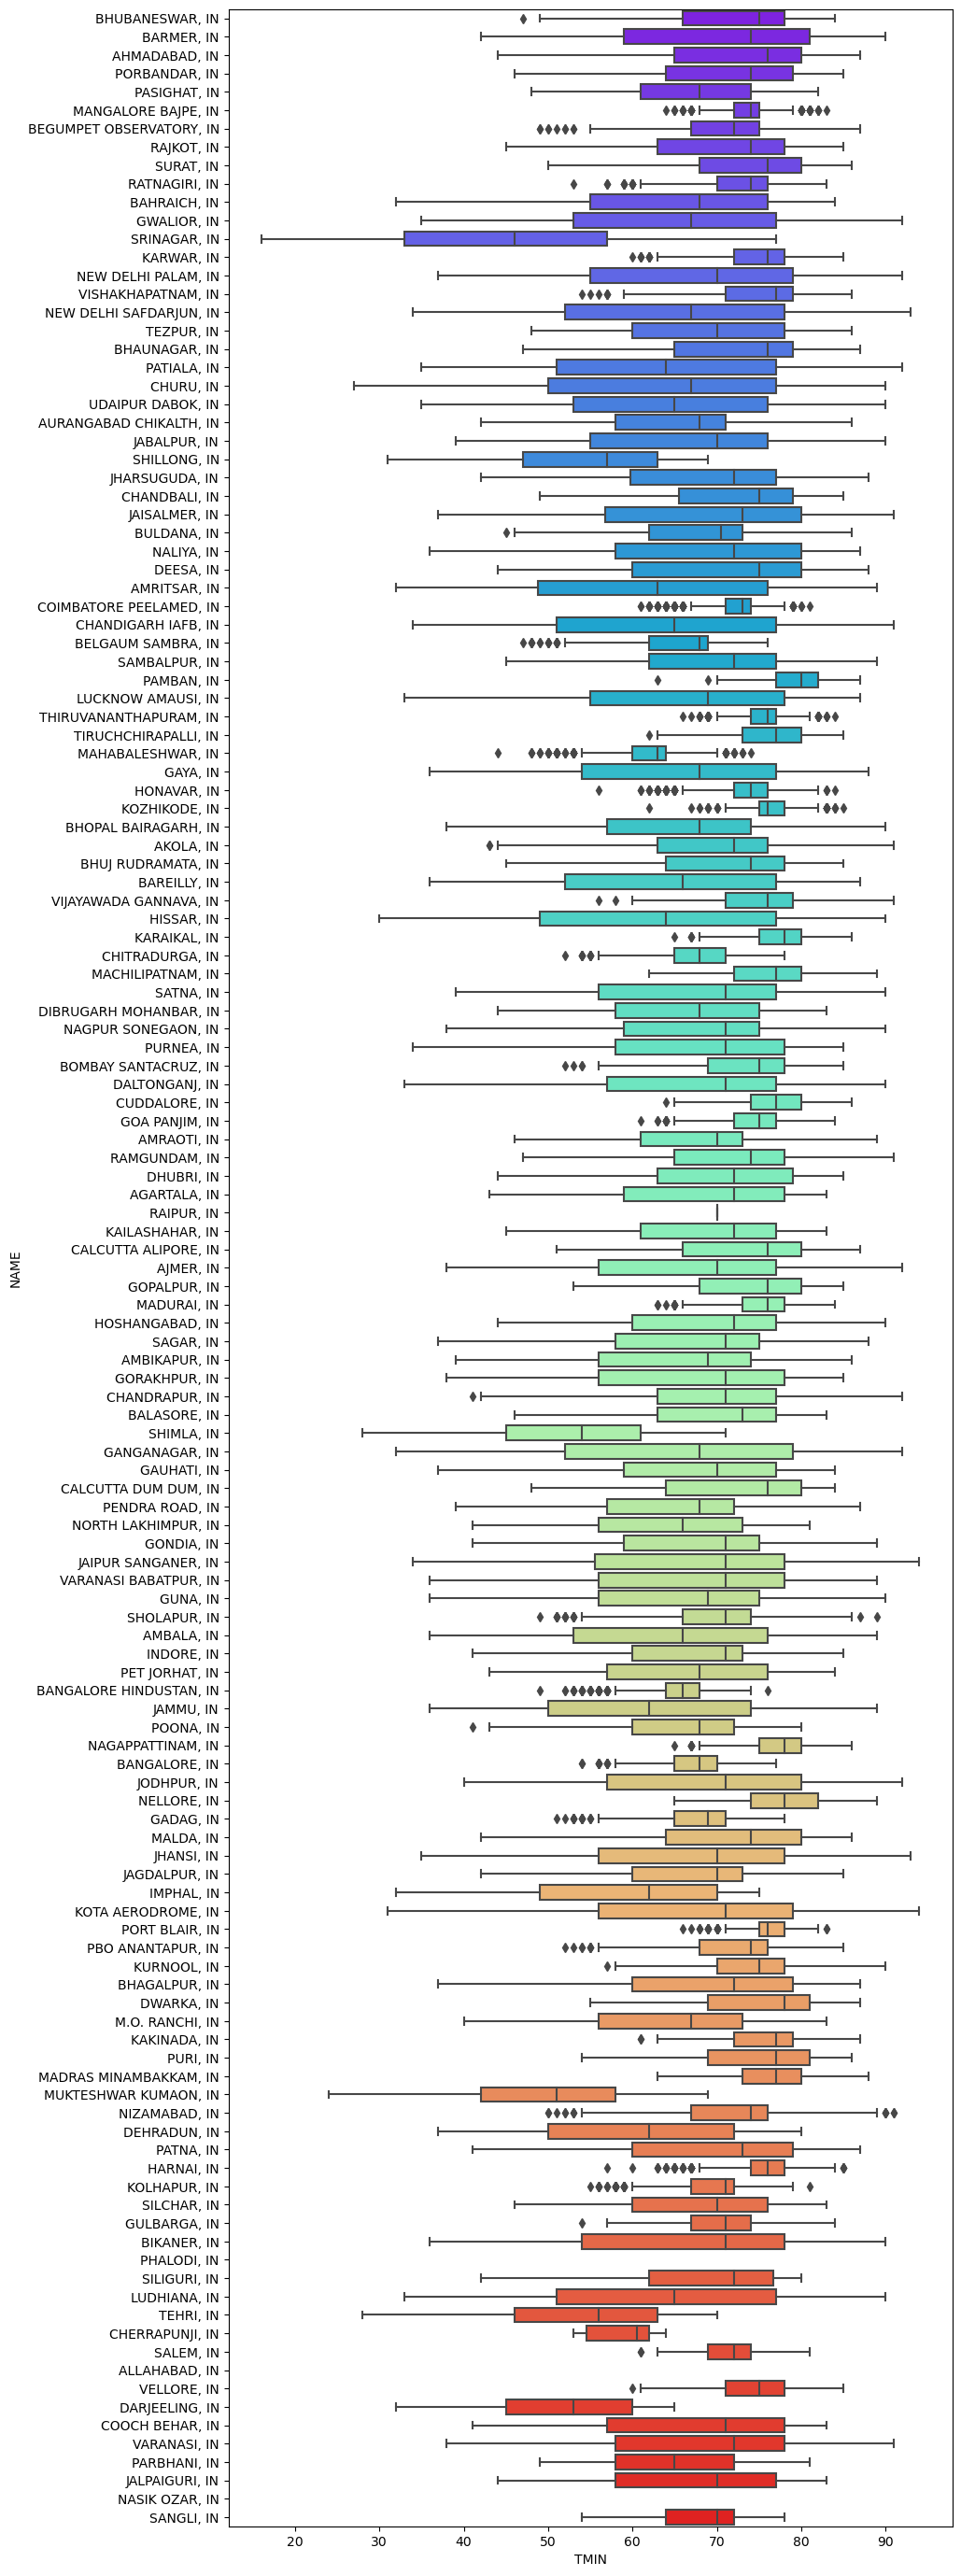

In [16]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='TMIN',data=weather,palette='rainbow')

<AxesSubplot:xlabel='TMAX', ylabel='PRCP'>

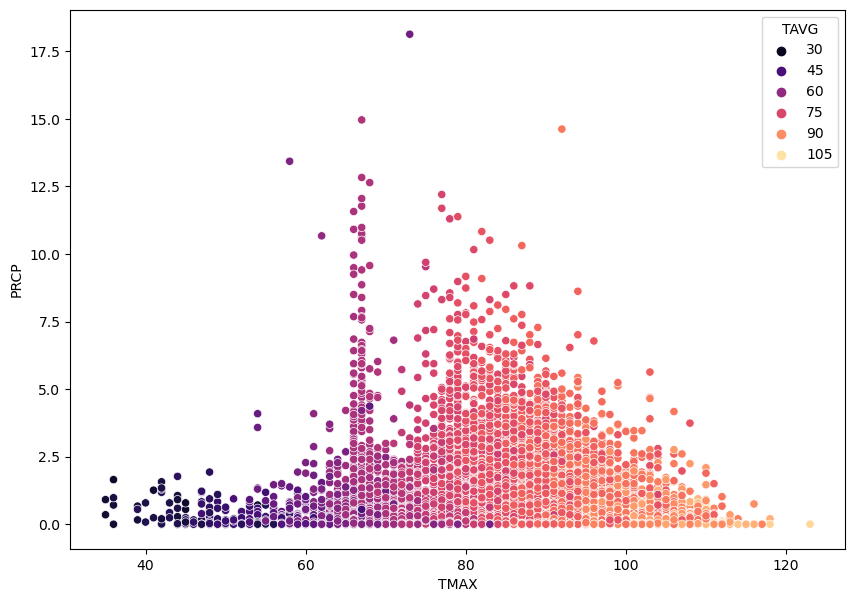

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='PRCP',x='TMAX',hue='TAVG',data=weather,palette='magma')

In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224200 entries, 01-01-2018 to 31-12-2022
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STATION    224200 non-null  object 
 1   NAME       224200 non-null  object 
 2   LATITUDE   224200 non-null  float64
 3   LONGITUDE  224200 non-null  float64
 4   ELEVATION  224200 non-null  float64
 5   PRCP       72155 non-null   float64
 6   TAVG       224200 non-null  int64  
 7   TMAX       118640 non-null  float64
 8   TMIN       187867 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.1+ MB


In [19]:
print('Percentage of Null Values :')
weather.apply(pd.isnull).sum()/weather.shape[0]*100

Percentage of Null Values :


STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
PRCP         67.816682
TAVG          0.000000
TMAX         47.082962
TMIN         16.205620
dtype: float64

In [20]:
weather1 = weather[["PRCP", "TMAX", "TMIN","LONGITUDE","LATITUDE"]].copy()
weather1.columns = ['precip','temp_max','temp_min','lat','long']

In [21]:
weather1.apply(pd.isnull).sum()/weather1.shape[0]*100

precip      67.816682
temp_max    47.082962
temp_min    16.205620
lat          0.000000
long         0.000000
dtype: float64

In [22]:
weather1[pd.isnull(weather1['precip'])]

precip  temp_max  temp_min     lat    long
DATE                                                  
01-01-2018     NaN       NaN       NaN  85.833  20.250
01-01-2018     NaN      84.0      51.0  71.383  25.750
01-01-2018     NaN       NaN      51.0  72.633  23.067
01-01-2018     NaN      85.0      54.0  69.667  21.650
01-01-2018     NaN      78.0      49.0  95.383  28.100
...            ...       ...       ...     ...     ...
31-12-2022     NaN       NaN      72.0  80.183  13.000
31-12-2022     NaN      74.0      49.0  83.017  25.300
31-12-2022     NaN      92.0      61.0  78.100  18.667
31-12-2022     NaN       NaN      43.0  78.033  30.317
31-12-2022     NaN       NaN      50.0  85.100  25.600

[152045 rows x 5 columns]

In [23]:
weather1['precip'].value_counts()/weather1.shape[0]

0.00     0.101971
0.04     0.016534
0.08     0.016467
0.02     0.015040
0.12     0.013091
           ...   
3.12     0.000004
15.51    0.000004
5.09     0.000004
11.34    0.000004
3.57     0.000004
Name: precip, Length: 588, dtype: float64

In [24]:
weather1['precip'] = weather1['precip'].fillna(0)

In [25]:
weather1.apply(pd.isnull).sum()

precip           0
temp_max    105560
temp_min     36333
lat              0
long             0
dtype: int64

In [26]:
weather1[pd.isnull(weather1['temp_min'])]

precip  temp_max  temp_min     lat    long
DATE                                                  
01-01-2018     0.0       NaN       NaN  85.833  20.250
01-01-2018     0.0      68.0       NaN  77.117  28.567
01-01-2018     0.0       NaN       NaN  79.950  23.200
01-01-2018     0.0      70.0       NaN  76.883  30.733
01-01-2018     0.0      64.0       NaN  80.883  26.750
...            ...       ...       ...     ...     ...
31-12-2022     0.0       NaN       NaN  77.633  12.950
31-12-2022     0.0       NaN       NaN  75.633  15.417
31-12-2022     0.0      84.0       NaN  78.617  25.450
31-12-2022     0.0       NaN       NaN  73.917  20.133
31-12-2022     0.0      81.0       NaN  75.850  25.150

[36333 rows x 5 columns]

In [27]:
weather1.loc['10-10-2022':'20-10-2022']

precip  temp_max  temp_min     lat    long
DATE                                                  
10-10-2022    0.00      79.0      73.0  74.600  16.850
10-10-2022    0.16      90.0      74.0  85.833  20.250
10-10-2022    0.00       NaN      76.0  71.383  25.750
10-10-2022    0.00       NaN      78.0  72.633  23.067
10-10-2022    0.00      94.0       NaN  69.667  21.650
...            ...       ...       ...     ...     ...
20-10-2022    0.00      93.0      66.0  83.017  25.300
20-10-2022    0.00      67.0      45.0  79.650  29.467
20-10-2022    0.00      91.0      75.0  78.100  18.667
20-10-2022    0.00      85.0       NaN  78.033  30.317
20-10-2022    0.00       NaN      72.0  85.100  25.600

[1381 rows x 5 columns]

In [28]:
weather1 = weather1.fillna(method='ffill')

In [29]:
weather1['temp_max'] = weather1['temp_max'].fillna(0)
weather1.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    1
lat         0
long        0
dtype: int64

In [30]:
weather1['temp_min'] = weather1['temp_min'].fillna(0)
weather1.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
lat         0
long        0
dtype: int64

<a id="check"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    4. Checking for Missing Value 
</h3>
</center>


[Table of contents](#table)

In [31]:
weather1.dtypes

precip      float64
temp_max    float64
temp_min    float64
lat         float64
long        float64
dtype: object

In [32]:
weather1.index

Index(['01-01-2018', '01-01-2018', '01-01-2018', '01-01-2018', '01-01-2018',
       '01-01-2018', '01-01-2018', '01-01-2018', '01-01-2018', '01-01-2018',
       ...
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022',
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022'],
      dtype='object', name='DATE', length=224200)

In [33]:
weather1.index = pd.to_datetime(weather1.index)
weather1.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=224200, freq=None)

In [34]:
weather1.index.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=224200)

In [35]:
weather1.apply(lambda x: (x <= -1).sum())

precip      0
temp_max    0
temp_min    0
lat         0
long        0
dtype: int64

In [36]:
weather1.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
lat         0
long        0
dtype: int64

<AxesSubplot:xlabel='DATE'>

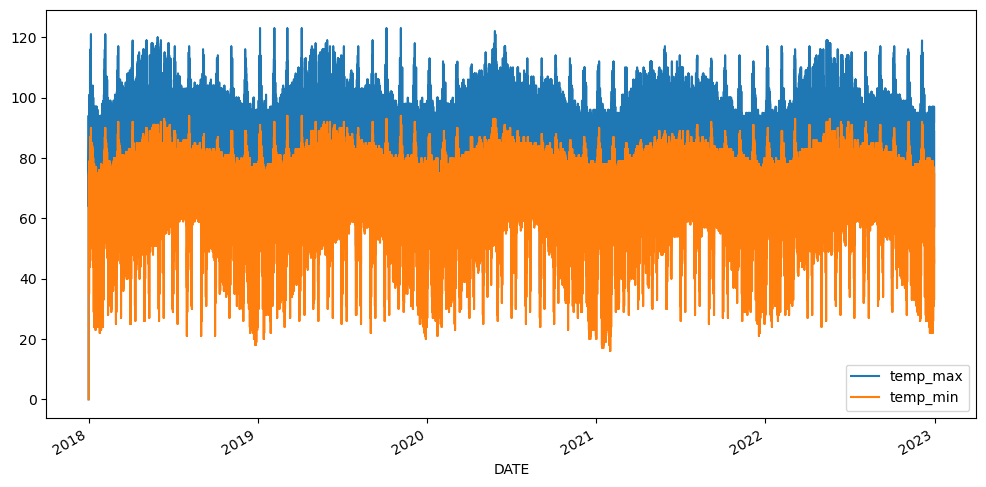

In [37]:
weather1[['temp_max','temp_min']].plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

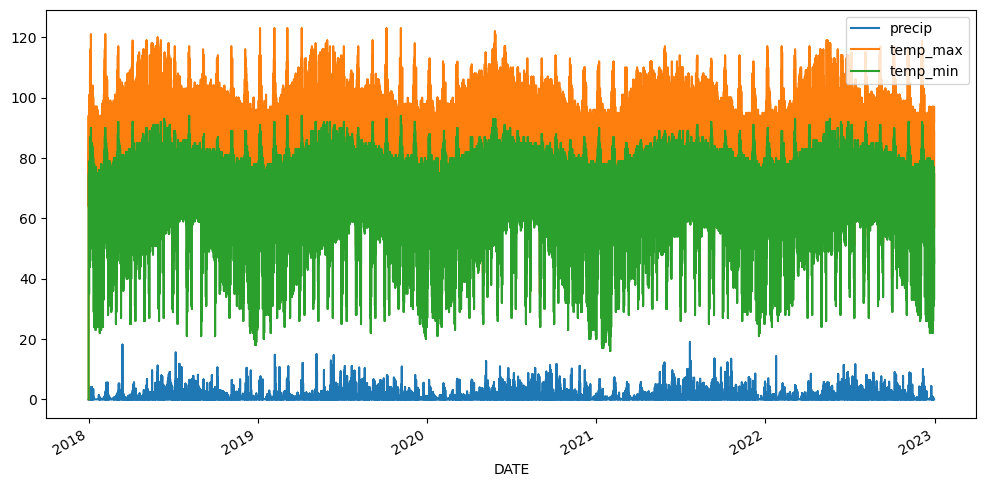

In [38]:
weather1[['precip','temp_max','temp_min']].plot(figsize=(12,6))

In [39]:
weather1.index.year.value_counts()

2022    46285
2020    45123
2019    44916
2021    44696
2018    43180
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

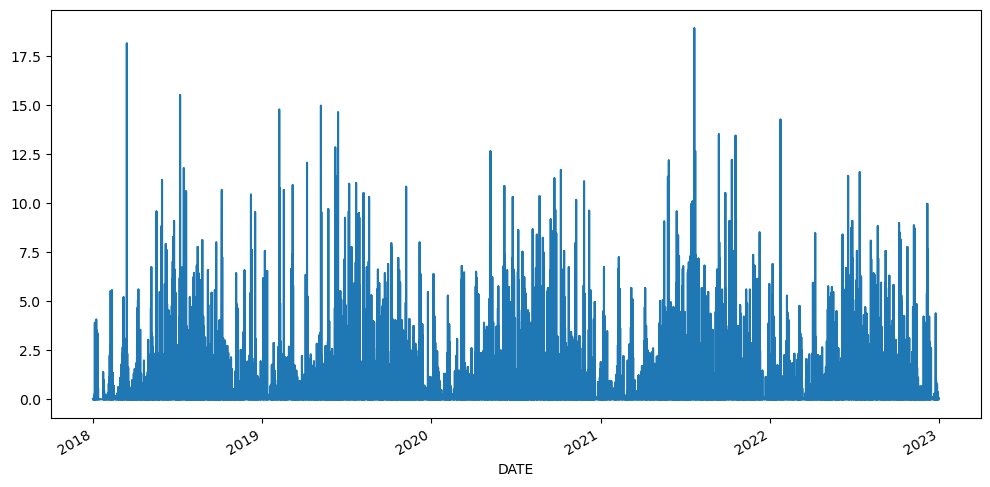

In [40]:
weather1['precip'].plot(figsize=(12,6))

In [41]:
weather1.groupby(weather1.index).apply(lambda x: x["precip"].sum())

DATE
2018-01-01     0.02
2018-01-02     0.04
2018-01-03     0.04
2018-01-04     0.03
2018-01-05    19.65
              ...  
2022-12-27     4.61
2022-12-28     1.83
2022-12-29     0.06
2022-12-30     0.69
2022-12-31     0.08
Length: 1824, dtype: float64

<AxesSubplot:xlabel='DATE'>

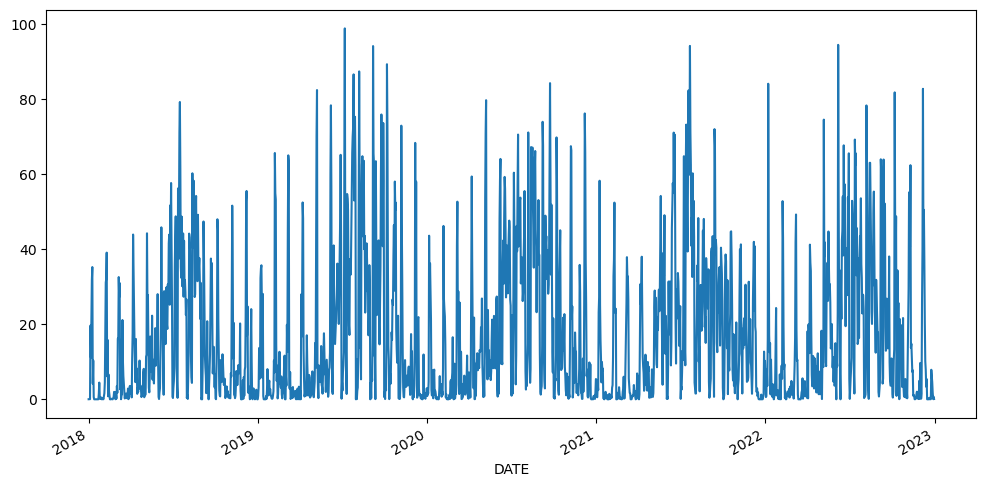

In [42]:
weather1.groupby(weather1.index).apply(lambda x: x["precip"].sum()).plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

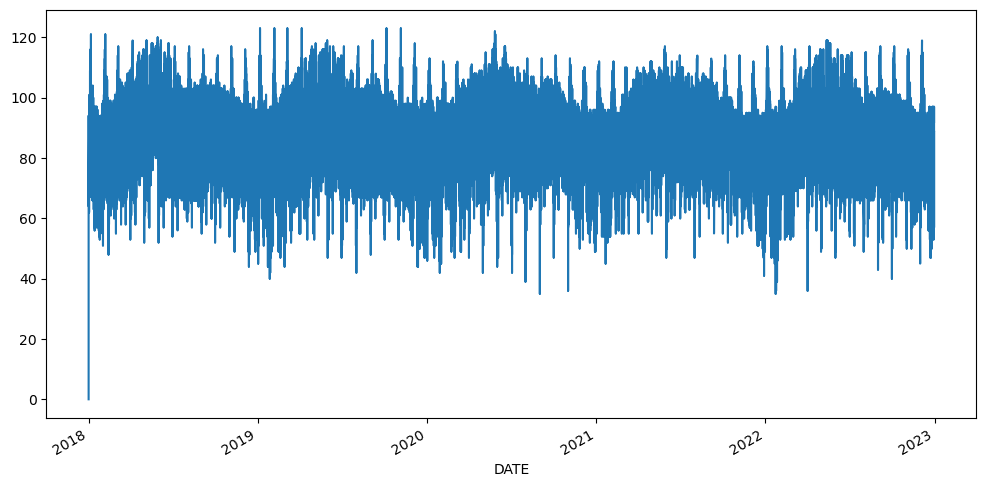

In [43]:
weather1['temp_max'].plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

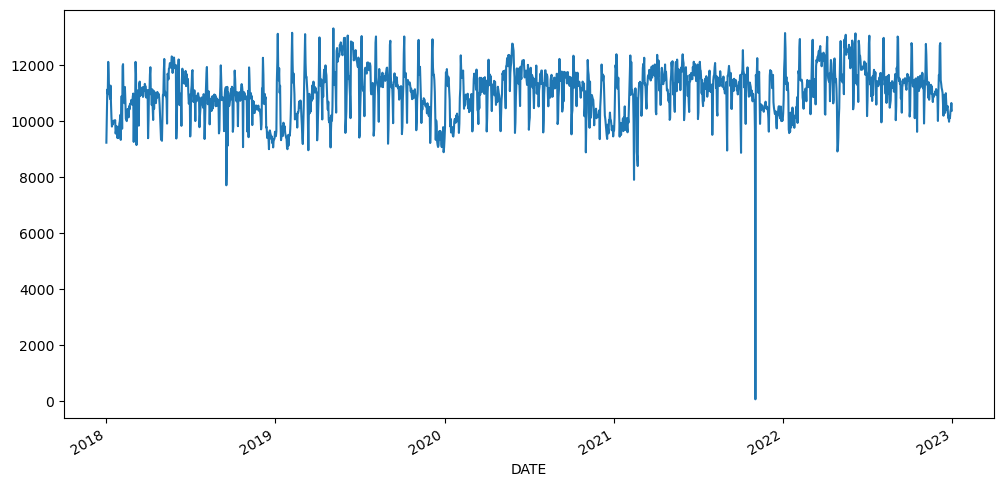

In [44]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_max"].sum()).plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

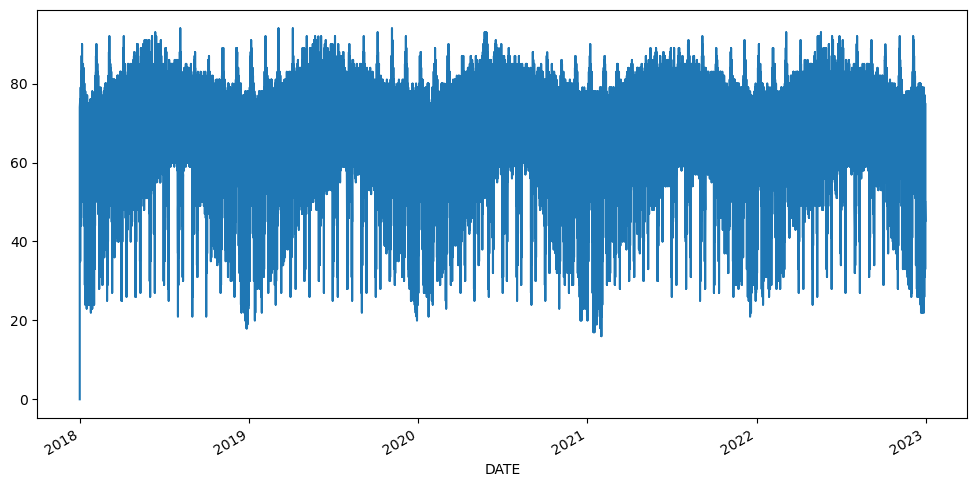

In [45]:
weather1['temp_min'].plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

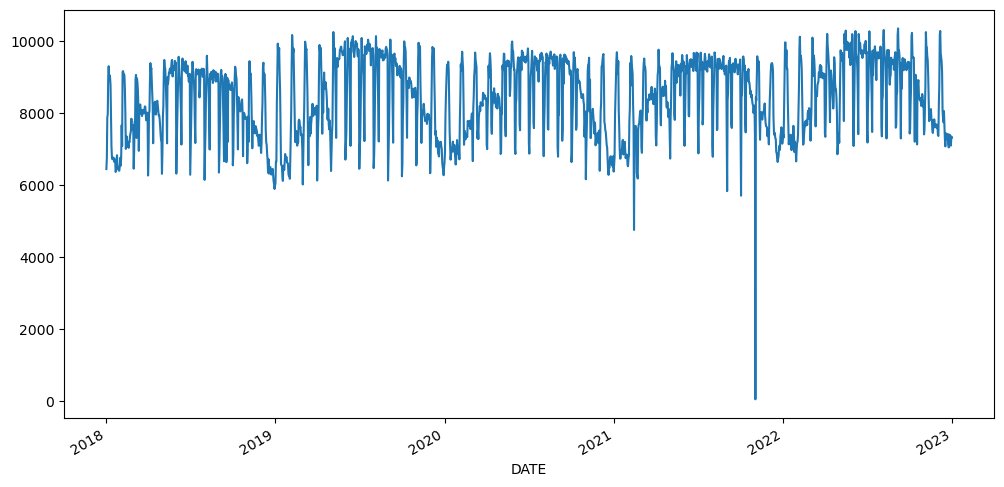

In [46]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_min"].sum()).plot(figsize=(12,6))

<a id="train"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    5. Training ML Model
</h3>
</center>


[Table of contents](#table)

In [47]:
weather1['target'] = weather1.shift(-1)['temp_max']

In [48]:
weather1

precip  temp_max  temp_min     lat    long  target
DATE                                                          
2018-01-01     0.0       0.0       0.0  85.833  20.250    84.0
2018-01-01     0.0      84.0      51.0  71.383  25.750    84.0
2018-01-01     0.0      84.0      51.0  72.633  23.067    85.0
2018-01-01     0.0      85.0      54.0  69.667  21.650    78.0
2018-01-01     0.0      78.0      49.0  95.383  28.100    91.0
...            ...       ...       ...     ...     ...     ...
2022-12-31     0.0      74.0      49.0  83.017  25.300    57.0
2022-12-31     0.0      57.0      33.0  79.650  29.467    92.0
2022-12-31     0.0      92.0      61.0  78.100  18.667    92.0
2022-12-31     0.0      92.0      43.0  78.033  30.317    92.0
2022-12-31     0.0      92.0      50.0  85.100  25.600     NaN

[224200 rows x 6 columns]

In [49]:
weather1 = weather1.iloc[:-1,:].copy()

In [50]:
weather1

precip  temp_max  temp_min     lat    long  target
DATE                                                          
2018-01-01     0.0       0.0       0.0  85.833  20.250    84.0
2018-01-01     0.0      84.0      51.0  71.383  25.750    84.0
2018-01-01     0.0      84.0      51.0  72.633  23.067    85.0
2018-01-01     0.0      85.0      54.0  69.667  21.650    78.0
2018-01-01     0.0      78.0      49.0  95.383  28.100    91.0
...            ...       ...       ...     ...     ...     ...
2022-12-31     0.0      90.0      72.0  80.183  13.000    74.0
2022-12-31     0.0      74.0      49.0  83.017  25.300    57.0
2022-12-31     0.0      57.0      33.0  79.650  29.467    92.0
2022-12-31     0.0      92.0      61.0  78.100  18.667    92.0
2022-12-31     0.0      92.0      43.0  78.033  30.317    92.0

[224199 rows x 6 columns]

In [51]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# loading boston dataset
X = weather1.iloc[:,:5]
y = weather1.target

print ("Weather dataset keys : \n", weather1.keys())


# scaling the inputs
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Weather dataset keys : 
 Index(['precip', 'temp_max', 'temp_min', 'lat', 'long', 'target'], dtype='object')


In [52]:
# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,train_size = 0.7)

In [53]:
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, solver ='auto', random_state = 42)
model.fit(X_train, y_train)

# predicting the y_test
y_pred = model.predict(X_test)

# finding score for our model
score = model.score(X_test, y_test)
print("Model score : ", score)

Model score :  0.4437244320705207


In [54]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 5.173093526222683


<a id="eva"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    6. Evaluate Model
</h3>
</center>

[Table of contents](#table)

In [55]:
print(X_test,'\n\n')
print(X_train)

[[-0.25416542 -0.47915248 -2.21291314 -0.79590011  1.83449364]
 [ 0.10546554 -1.27698539 -0.15217094 -0.34512983 -1.46397543]
 [ 0.30326256  0.51813865  0.65420644  0.55914754  0.24523279]
 ...
 [-0.25416542 -0.17996515 -0.60015837  0.02788257  0.25075338]
 [ 0.30326256 -1.17725628  0.20621901 -0.32098142 -0.12849444]
 [-0.25416542 -0.5788816   0.74380393 -0.44172346 -0.16747315]] 


[[-0.25416542 -0.27969426  1.10219388  0.8569779   0.65225086]
 [ 1.31022922  0.21895131  1.10219388  1.39629234  0.15874355]
 [-0.25416542  1.01678421  0.65420644 -0.95946532 -1.0402283 ]
 ...
 [-0.25416542 -0.08023603  0.11662152  0.01178363 -1.82917084]
 [-0.25416542 -0.17996515  1.10219388  0.39542134 -0.79481296]
 [-0.21820232 -0.67861071  0.29581649 -0.32098142 -0.12849444]]


In [56]:
print(y_train,'\n\n')
print(y_test)

DATE
2019-07-31     87.0
2022-07-13    103.0
2021-03-31    106.0
2018-02-25     96.0
2019-09-13     87.0
              ...  
2022-09-01     67.0
2022-03-11     90.0
2021-02-28     67.0
2019-08-29     88.0
2018-08-23     90.0
Name: target, Length: 156939, dtype: float64 


DATE
2020-10-02     85.0
2019-02-12     77.0
2021-06-28     95.0
2019-12-05     97.0
2018-03-04     90.0
              ...  
2018-05-15    104.0
2018-10-07     96.0
2020-01-03     88.0
2019-09-13     78.0
2021-07-18     84.0
Name: target, Length: 67260, dtype: float64


In [57]:
combined = pd.concat([y_test,pd.Series(y_pred,index=y_test.index)],axis=1)
combined.columns = ['actual','predictions']

In [58]:
combined

actual  predictions
DATE                           
2020-10-02    85.0    85.380061
2019-02-12    77.0    80.985598
2021-06-28    95.0    93.967478
2019-12-05    97.0    91.402071
2018-03-04    90.0    90.099724
...            ...          ...
2018-05-15   104.0    92.878751
2018-10-07    96.0    89.405594
2020-01-03    88.0    88.048292
2019-09-13    78.0    83.142486
2021-07-18    84.0    87.186372

[67260 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

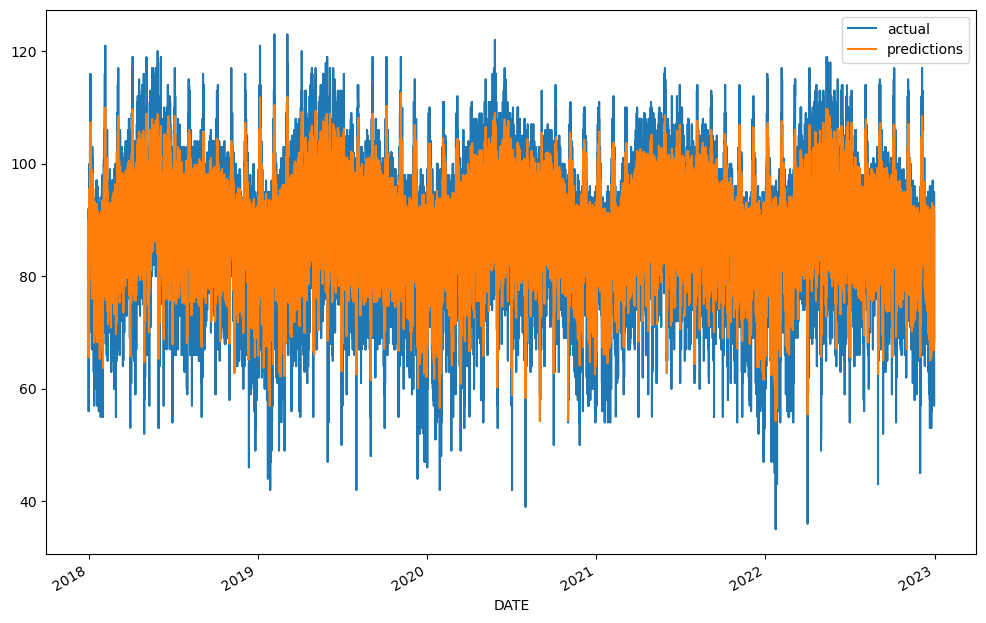

In [59]:
combined.plot(figsize=(12,8))

In [60]:
model.coef_

array([ 0.28430697,  5.86939596,  1.3365225 , -0.01683403,  0.77628488])

<a id="func"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    7. Function to Make Prediction
</h3>
</center>

[Table of contents](#table)

In [61]:
def create_predictions(predictors,weather1,model):
    # training model with 0.5 alpha value
    model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, solver ='auto', random_state = 42)
    model.fit(X_train, y_train)

    # predicting the y_test
    y_pred = model.predict(X_test)
      
    error = mean_absolute_error(y_test,y_pred)
    
    combined = pd.concat([y_test,pd.Series(y_pred,index=y_test.index)],axis=1)
    combined.columns = ['actual','predictions']
    
    return error, combined

<a id="add"></a>


<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    8. Addition of Rolling Means 
</h3>
</center>

[Table of contents](#table)

In [62]:
weather1['month_max'] = weather1['temp_max'].rolling(30).mean()
weather1['month_day_max'] = weather1['month_max'] / weather1['temp_max']
weather1['max_min'] = weather1['temp_max'] / weather1['temp_min']

In [63]:
predictors = ['precip','temp_max','temp_min','month_day_max','max_min']

In [64]:
weather1 = weather1.iloc[30:,:].copy()

In [65]:
error,combined = create_predictions(predictors,weather1,model)

print('Mean Absolute Error :',error)

Mean Absolute Error : 5.173093526222683


<AxesSubplot:xlabel='DATE'>

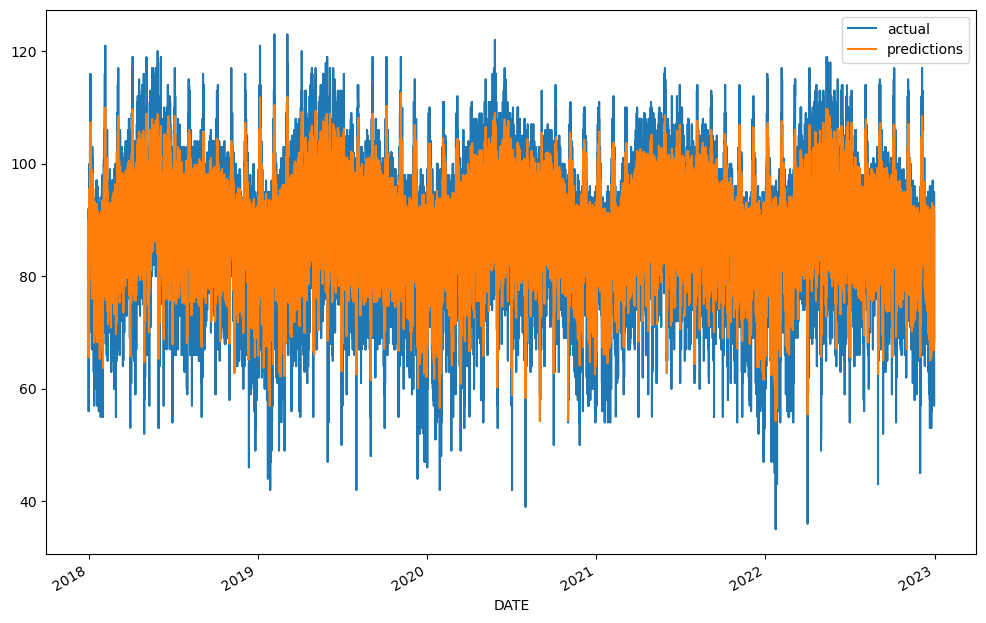

In [66]:
combined.plot(figsize=(12,8))

<a id="add"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    9. Adding Monthly and Daily Averages
</h3>
</center>

[Table of contents](#table)

In [67]:
weather1['monthly_avg'] = weather1['temp_max'].groupby(weather1.index.month).apply(lambda x:x.expanding(1).mean())
weather1["day_of_year_avg"] = weather1["temp_max"].groupby(weather1.index.dayofyear).apply(lambda x: x.expanding(1).mean())

In [68]:
weather1

precip  temp_max  temp_min     lat    long  target  month_max  \
DATE                                                                        
2018-01-01     0.0      83.0      48.0  72.200  24.200    71.0  78.800000   
2018-01-01     0.0      71.0      41.0  74.797  31.710    71.0  78.366667   
2018-01-01     0.0      71.0      66.0  77.050  11.033    70.0  77.933333   
2018-01-01     0.0      70.0      66.0  76.883  30.733    70.0  77.433333   
2018-01-01     0.0      70.0      51.0  74.617  15.850    85.0  77.166667   
...            ...       ...       ...     ...     ...     ...        ...   
2022-12-31     0.0      90.0      72.0  80.183  13.000    74.0  80.233333   
2022-12-31     0.0      74.0      49.0  83.017  25.300    57.0  80.533333   
2022-12-31     0.0      57.0      33.0  79.650  29.467    92.0  80.266667   
2022-12-31     0.0      92.0      61.0  78.100  18.667    92.0  80.933333   
2022-12-31     0.0      92.0      43.0  78.033  30.317    92.0  81.600000   

            month_day_max   max_min  monthly_avg  day_of_year_avg  
DATE                                                               
2018-01-01       0.949398  1.729167    83.000000        83.000000  
2018-01-01       1.103756  1.731707    77.000000        77.000000  
2018-01-01       1.097653  1.075758    75.000000        75.000000  
2018-01-01       1.106190  1.060606    73.750000        73.750000  
2018-01-01       1.102381  1.372549    73.000000        73.000000  
...                   ...       ...          ...              ...  
2022-12-31       0.891481  1.250000    83.046172        76.996800  
2022-12-31       1.088288  1.510204    83.045699        76.992013  
2022-12-31       1.408187  1.727273    83.044339        76.960128  
2022-12-31       0.879710  1.508197    83.044807        76.984076  
2022-12-31       0.886957  2.139535    83.045274        77.007949  

[224169 rows x 11 columns]

In [69]:
predictors = ['precip','temp_max','temp_min','month_day_max','max_min','monthly_avg','day_of_year_avg']

In [70]:
error, combined = create_predictions(predictors, weather1, model)
print('Mean Absolute Error :',error)

Mean Absolute Error : 5.173093526222683


<a id="run"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    10. Running Model Diagnostics
</h3>
</center>

[Table of contents](#table)

In [71]:
model.coef_

array([ 0.28430697,  5.86939596,  1.3365225 , -0.01683403,  0.77628488])

In [72]:
weather1.corr()["target"]

precip             0.014176
temp_max           0.656476
temp_min           0.461343
lat               -0.021351
long              -0.024699
target             1.000000
month_max          0.633011
month_day_max     -0.297553
max_min           -0.054600
monthly_avg        0.378183
day_of_year_avg    0.608251
Name: target, dtype: float64

In [73]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [74]:
combined.sort_values("diff", ascending=False).head(10)

actual  predictions       diff
DATE                                      
2022-01-23    35.0    94.049458  59.049458
2020-01-29    42.0    91.562400  49.562400
2020-08-01    39.0    86.819988  47.819988
2022-09-01    43.0    90.326752  47.326752
2022-01-23    43.0    89.746736  46.746736
2019-08-02    42.0    87.920526  45.920526
2022-01-14    47.0    92.796183  45.796183
2022-12-01    45.0    90.095537  45.095537
2019-01-28    42.0    86.869576  44.869576
2019-01-23    44.0    88.489112  44.489112

<AxesSubplot:xlabel='actual', ylabel='predictions'>

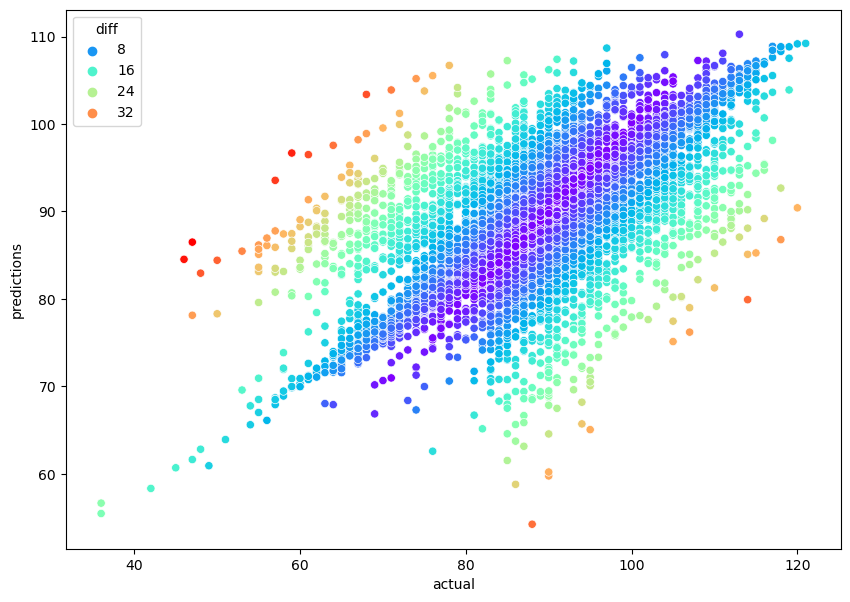

In [75]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='predictions',x='actual',hue='diff',data=combined[:10000],palette='rainbow')

<AxesSubplot:xlabel='DATE'>

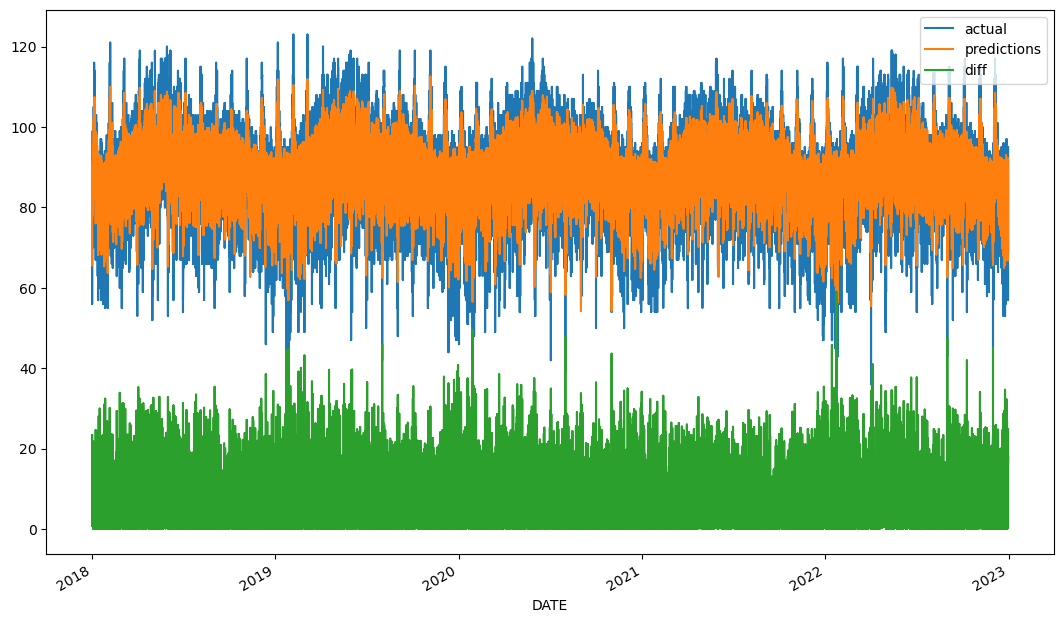

In [76]:
combined.plot(figsize=(13,8))

<AxesSubplot:>

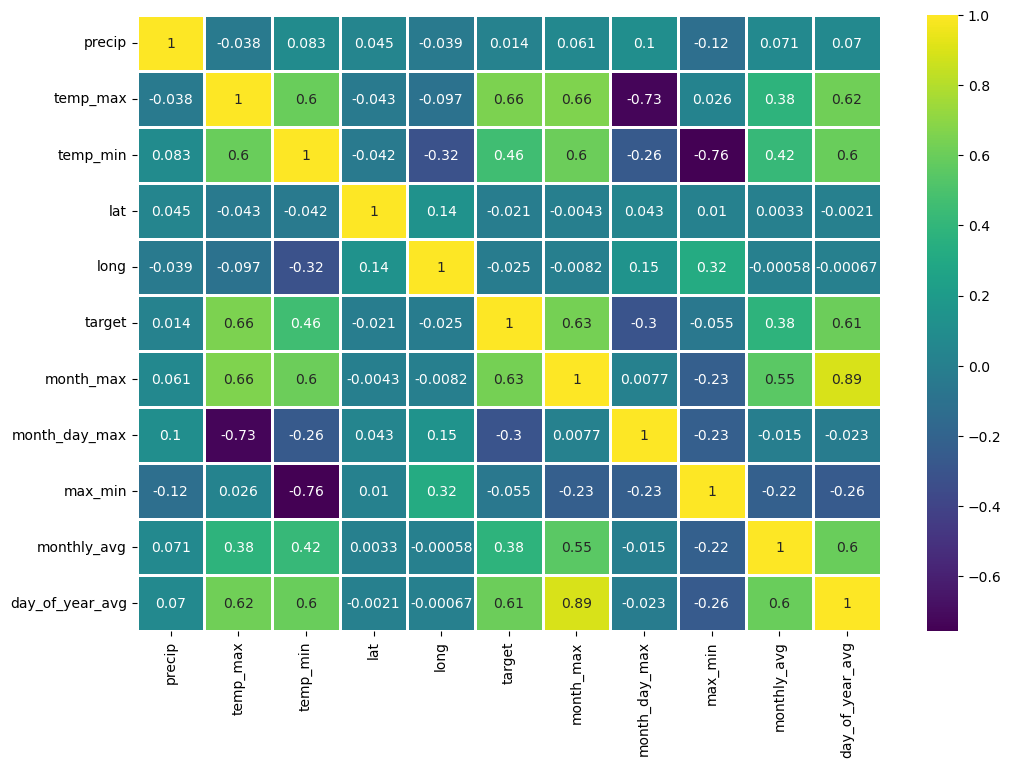

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(weather1.corr(),cmap='viridis',annot=True,linecolor ='white', linewidths = 1)

<AxesSubplot:>

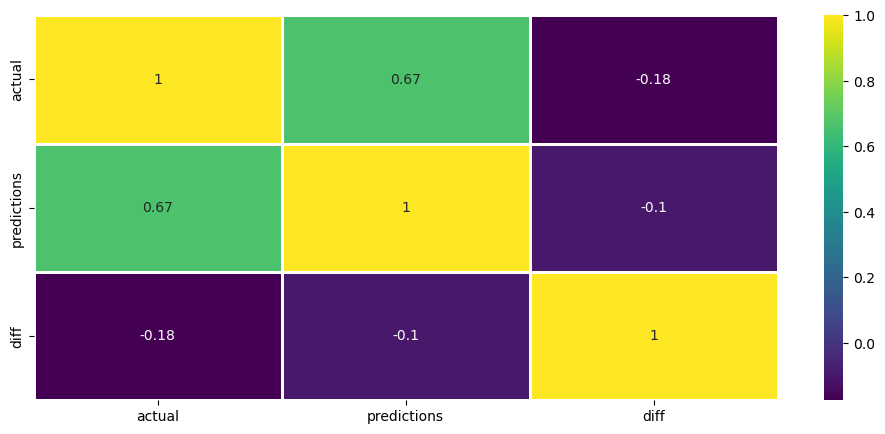

In [78]:
plt.figure(figsize=(12,5))
sns.heatmap(combined.corr(),cmap='viridis',annot=True,linecolor ='white', linewidths = 1)

In [93]:
submission = pd.DataFrame(combined)
submission.to_csv("Submission.csv")
print("Output of 'India Weather Predicted Model Data' is Converted into CSV file")

Output of 'India Weather Predicted Model Data' is Converted into CSV file


In [105]:
from jupyter_datatables import init_datatables_mode
init_datatables_mode()

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

In [106]:
Subs = pd.read_csv("India 2023 Weather Predicted Data.csv")
Subs

<JupyterRequire.display.SafeScript object>

DATE  actual  predictions       diff
0      2021-06-27    78.0    94.398672  16.398672
1      2022-06-03    85.0    92.350680   7.350680
2      2019-02-02    69.0    85.247178  16.247178
3      2021-06-06    89.0    90.966002   1.966002
4      2022-12-08    99.0    87.520006  11.479994
...           ...     ...          ...        ...
67255  2019-03-09    80.0    84.555282   4.555282
67256  2021-12-12    76.0    80.650867   4.650867
67257  2019-08-11    92.0    84.552716   7.447284
67258  2020-08-15    89.0    90.097638   1.097638
67259  2021-09-12    84.0    80.867187   3.132813

[67260 rows x 4 columns]

In [107]:
list_ = []
for i in y_pred[:10]:
    reg = Ridge(alpha=0.1)
    reg

    reg.fit(combined,y_pred)
    reg.score(combined,y_pred)
    
    reg.predict([[i,i,i]])
    
    list_.append(reg.predict([[i,i,i]]))
    
    
list_ = np.array(list_)
list_ = list_.tolist()
                 
print(list_)

[[85.38006140932755], [80.98559829337285], [93.96747807168816], [91.40207143641906], [90.09972435460296], [99.04614358144414], [96.54358877613576], [100.9839960300573], [107.22107438653101], [89.22818750984308]]


In [108]:
combined_ = combined.merge(weather,left_on=['actual','predictions'],right_on=['TMAX','PRCP'],how='left')
combined_.drop(weather[2:],axis=1,inplace=True)

In [109]:
combined_

<JupyterRequire.display.SafeScript object>

actual  predictions       diff
0        85.0    85.380061   0.380061
1        77.0    80.985598   3.985598
2        95.0    93.967478   1.032522
3        97.0    91.402071   5.597929
4        90.0    90.099724   0.099724
...       ...          ...        ...
67255   104.0    92.878751  11.121249
67256    96.0    89.405594   6.594406
67257    88.0    88.048292   0.048292
67258    78.0    83.142486   5.142486
67259    84.0    87.186372   3.186372

[67260 rows x 3 columns]

<a id="geo"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    11. GeoMap Creation
</h3>
</center>


[Table of contents](#table)

In [110]:
from geopy.geocoders import ArcGIS
import folium

In [111]:
nom=ArcGIS()

In [112]:
a_list1 = weather[['NAME','LATITUDE','LONGITUDE']].values.tolist()

In [113]:
a_list = a_list1[:100]
a_list

[['BHUBANESWAR, IN', 20.25, 85.833],
 ['BARMER, IN', 25.75, 71.383],
 ['AHMADABAD, IN', 23.066999999999997, 72.633],
 ['PORBANDAR, IN', 21.65, 69.667],
 ['PASIGHAT, IN', 28.1, 95.383],
 ['MANGALORE BAJPE, IN', 12.917, 74.883],
 ['BEGUMPET OBSERVATORY, IN', 17.45, 78.47],
 ['RAJKOT, IN', 22.3, 70.783],
 ['SURAT, IN', 21.2, 72.833],
 ['RATNAGIRI, IN', 16.983, 73.333],
 ['BAHRAICH, IN', 27.566999999999997, 81.6],
 ['GWALIOR, IN', 26.233, 78.25],
 ['SRINAGAR, IN', 34.083, 74.833],
 ['KARWAR, IN', 14.783, 74.133],
 ['NEW DELHI PALAM, IN', 28.566999999999997, 77.117],
 ['VISHAKHAPATNAM, IN', 17.717, 83.23299999999999],
 ['NEW DELHI SAFDARJUN, IN', 28.583000000000002, 77.2],
 ['TEZPUR, IN', 26.616999999999997, 92.78299999999999],
 ['BHAUNAGAR, IN', 21.75, 72.2],
 ['PATIALA, IN', 30.333000000000002, 76.467],
 ['CHURU, IN', 28.25, 74.917],
 ['UDAIPUR DABOK, IN', 24.616999999999997, 73.883],
 ['AURANGABAD CHIKALTH, IN', 19.85, 75.4],
 ['JABALPUR, IN', 23.2, 79.95],
 ['SHILLONG, IN', 25.566999999

In [114]:
weather_map = folium.Map(location=[11.033,77.05])
fg = folium.FeatureGroup(name='weather')

for i in a_list:
    fg.add_child(folium.Marker(location = [i[1],i[2]],popup=i[0],icon=folium.Icon(color='red'),icon_size=0.5))
weather_map.add_child(fg)

In [115]:
weather_map.save('India Weather 2008-2022 Visualisation on Location.html')

<a id="create"></a>

<center>
<h3 name="illness" style="border-color: black;  
           border-width: 2px;
           color: black;
           font-size:25px;
           background-color: yellow;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 5px">
    12. Creation of Pandas Profiling Report
</h3>
</center>


[Table of contents](#table)

In [116]:
from pandas_profiling import ProfileReport

profile = ProfileReport(weather, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
profile.to_file("India 2022 Weather Pandas Profiling Report - Anandan Raju.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]